In [2]:
import pandas as pd 
import os 

In [3]:
pwd = os.getcwd()
print(pwd)

x:\Datasets\Blockchain\xblock.pro\Phishing


In [4]:
result = pd.DataFrame()
for file in os.listdir(pwd + '/钓鱼一阶节点/'):
    if file.endswith(".csv"):
        df = pd.read_csv(pwd + '/钓鱼一阶节点/' + file)
        df = df.drop(columns=['Unnamed: 0'])
        address = file.split('.')[0]
        item = {}
        item['address'] = address
        # 统计每个地址的交易次数
        item['count'] = len(df)
        # 统计To列为address的交易次数
        item['to_count'] = len(df[df['To'] == address])
        # 统计From列为address的交易次数
        item['from_count'] = len(df[df['From'] == address])
        # 统计所有的地址
        item['all_address'] = len(set(df['From'].tolist() + df['To'].tolist())) - 1
        # 统计每个地址的平均交易次数
        item['all_address_avg_count'] = item['count'] / item['all_address']

        result = pd.concat([result, pd.DataFrame(item, index=[0])], axis=0)
        

In [5]:
result.head()

,address,count,to_count,from_count,all_address,all_address_avg_count
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,4,2,2,3,1.333333
0,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,5,3,2,4,1.250000
0,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,101,98,3,92,1.097826
0,0x0061fb5485dff4bb85c078dca80d19119224d97e,12,11,1,11,1.090909
0,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,3,1,2,3,1.000000


In [6]:
result.describe()

,count,to_count,from_count,all_address,all_address_avg_count
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000
mean,32.539759,23.958434,8.623494,23.904819,1.267222
std,81.702419,59.542429,31.692652,54.161141,0.911065
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,4.000000,3.000000,1.000000,4.000000,1.000000
50%,11.000000,8.000000,2.000000,10.000000,1.094494
75%,28.000000,22.000000,5.000000,23.000000,1.300000
max,1619.000000,906.000000,830.000000,1030.000000,33.250000


## 对单个钓鱼地址的分析

In [27]:
# 钓鱼一阶节点

phishing_filename = "0x3f8a37bde9b15b65c82f9cdd00192e0ba36cc5fc.csv"
phishing_filename = "0xaa2498d85ba7559006f90110a4bc33c10a06c1af.csv"

phishing_data = pd.read_csv(pwd + '/钓鱼一阶节点/' + phishing_filename)
phishing_data.head()

,Unnamed: 0,TxHash,BlockHeight,TimeStamp,From,To,Value,ContractAddress,Input,isError
0,0,0xd8e529a57d78550f2972ec55386e900a740969d9dca1...,5111793,1518944993,0xb01cb49fe0d6d6e47edf3a072d15dfe73155331c,0xaa2498d85ba7559006f90110a4bc33c10a06c1af,0.300000,NaN,0x,0
1,1,0xee0b71811924bb1236e9751b79c4894c62ea58f9847c...,5116169,1519008180,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,0xaa2498d85ba7559006f90110a4bc33c10a06c1af,0.409748,NaN,0x,0
2,2,0x98b3f812e7560672e63ec0d1bd3a74104f4495dfe113...,5116177,1519008360,0x24de3b4711dd71e439727d56381e2dc480c69ad3,0xaa2498d85ba7559006f90110a4bc33c10a06c1af,0.562397,NaN,0x,0
3,3,0x977a1f6a5764f698075f2643e6033010703afb83d88c...,5116208,1519008770,0x200eee5a1b77d124a76419d18c9c025207969f22,0xaa2498d85ba7559006f90110a4bc33c10a06c1af,0.400000,NaN,0x,0
4,4,0xbf034ac20cfb9f2494beaa170f960a449e5e8d5a7eeb...,5116209,1519008853,0x7bf7a96ceb22614afa1a509ce6385199210f9797,0xaa2498d85ba7559006f90110a4bc33c10a06c1af,0.060000,NaN,0x,0


In [28]:
# 去除Unnamed: 0列
phishing_data = phishing_data.drop(columns=['Unnamed: 0'])
# 按照时间排序
phishing_data = phishing_data.sort_values(by='TimeStamp')
phishing_data.head()

,TxHash,BlockHeight,TimeStamp,From,To,Value,ContractAddress,Input,isError
0,0xd8e529a57d78550f2972ec55386e900a740969d9dca1...,5111793,1518944993,0xb01cb49fe0d6d6e47edf3a072d15dfe73155331c,0xaa2498d85ba7559006f90110a4bc33c10a06c1af,0.300000,NaN,0x,0
1,0xee0b71811924bb1236e9751b79c4894c62ea58f9847c...,5116169,1519008180,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,0xaa2498d85ba7559006f90110a4bc33c10a06c1af,0.409748,NaN,0x,0
2,0x98b3f812e7560672e63ec0d1bd3a74104f4495dfe113...,5116177,1519008360,0x24de3b4711dd71e439727d56381e2dc480c69ad3,0xaa2498d85ba7559006f90110a4bc33c10a06c1af,0.562397,NaN,0x,0
3,0x977a1f6a5764f698075f2643e6033010703afb83d88c...,5116208,1519008770,0x200eee5a1b77d124a76419d18c9c025207969f22,0xaa2498d85ba7559006f90110a4bc33c10a06c1af,0.400000,NaN,0x,0
4,0xbf034ac20cfb9f2494beaa170f960a449e5e8d5a7eeb...,5116209,1519008853,0x7bf7a96ceb22614afa1a509ce6385199210f9797,0xaa2498d85ba7559006f90110a4bc33c10a06c1af,0.060000,NaN,0x,0


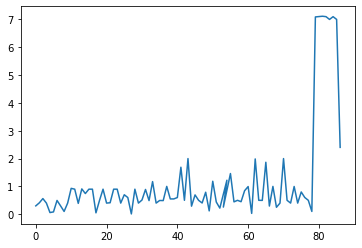

In [29]:
# 交易额画图
import matplotlib.pyplot as plt
plt.plot(phishing_data['Value'])

In [30]:
# 若当前交易的from为钓鱼地址，则为出钱交易，否则为入钱交易
phishing_data['is_out'] = phishing_data['From'] == phishing_filename.split('.')[0]

In [31]:
# 若为出钱交易，则为负数，否则为正数
phishing_data['tx_value'] = phishing_data['Value'] * phishing_data['is_out'].apply(lambda x: -1 if x else 1)

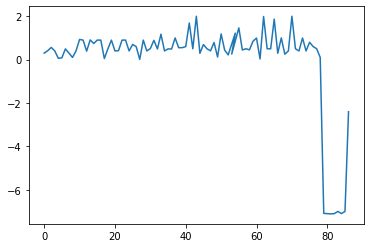

In [32]:
plt.plot(phishing_data['tx_value'])

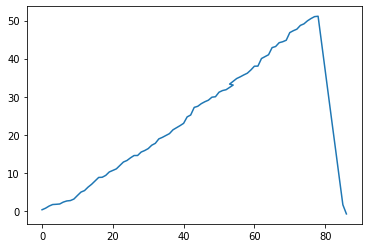

In [39]:
# 账户余额随时间变化
phishing_data['balance'] = phishing_data['tx_value'].cumsum()
plt.plot(phishing_data['balance'])

## 对单个正常账户进行分析

In [33]:
normal_filename = "0x0d323937359f60672ad5b7680535fa70341803b7.csv"
normal_filename = "0x0afa235c9d6a59c227be92995b7e55a4dbc9cc19.csv"

normal_data = pd.read_csv(pwd + '/非钓鱼一阶节点/' + normal_filename)
normal_data.head()

,Unnamed: 0,TxHash,BlockHeight,TimeStamp,From,To,Value,ContractAddress,Input,isError
0,0,0xf45db24e005a3f2b57b1ece7f2f3aca24f761ccae265...,3528778,1492095681,0x355db2ec54668038870d6ae87431b8ccb2c04653,0x0afa235c9d6a59c227be92995b7e55a4dbc9cc19,10000.000000,NaN,0x,0
1,1,0x5af96611b24d6215c6b88c5be85fe631a75e6d967dcc...,3528796,1492096060,0x355db2ec54668038870d6ae87431b8ccb2c04653,0x0afa235c9d6a59c227be92995b7e55a4dbc9cc19,14187.000000,NaN,0x,0
2,2,0xe39974fb5335edfbb2bebeb322861abc87a7e67b1226...,3532497,1492150592,0x72bfa9a95c2e8729574dd70c0b793a5ff1eef057,0x0afa235c9d6a59c227be92995b7e55a4dbc9cc19,5.000000,NaN,0x,0
3,3,0x299a774799d86ae63b82e77ef6f46f914a9eb31d04bf...,3532504,1492150670,0xebc2c6a26edd67ed4831066eed5b5d1ac5af6fa9,0x0afa235c9d6a59c227be92995b7e55a4dbc9cc19,19.868180,NaN,0x,0
4,4,0x3f46fc5ed2b3b547abbe802f87f896086619aaf51b93...,3532504,1492150670,0x34d05e6cf215c50478cf215dd797fabf97b19c07,0x0afa235c9d6a59c227be92995b7e55a4dbc9cc19,19.390754,NaN,0x,0


In [34]:
# 去除Unnamed: 0列
normal_data = normal_data.drop(columns=['Unnamed: 0'])
# 按照时间排序
normal_data = normal_data.sort_values(by='TimeStamp')

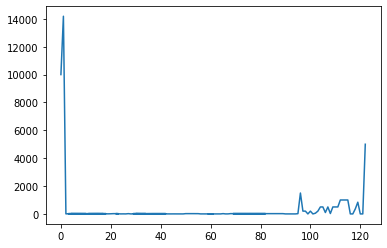

In [35]:
# 交易额画图
import matplotlib.pyplot as plt
plt.plot(normal_data['Value'])

In [36]:
# 若当前交易的from为当前地址，则为出钱交易，否则为入钱交易
normal_data['is_out'] = normal_data['From'] == normal_filename.split('.')[0]

In [37]:
# 若为出钱交易，则为负数，否则为正数
normal_data['tx_value'] = normal_data['Value'] * normal_data['is_out'].apply(lambda x: -1 if x else 1)

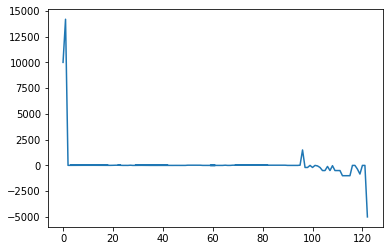

In [38]:
plt.plot(normal_data['tx_value'])

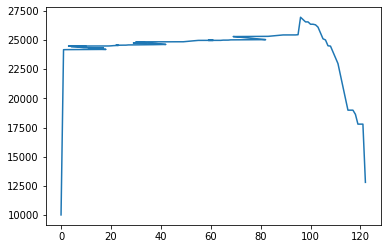

In [40]:
# 账户余额随时间变化
normal_data['balance'] = normal_data['tx_value'].cumsum()
plt.plot(normal_data['balance'])